<a href="https://colab.research.google.com/github/Milham10/PracticeML/blob/main/MobileNetKakiClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_paths = '/content/drive/MyDrive/dataset/Kaki-20221027T135405Z-001.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [42]:
image_paths=paths.list_images("/content/Kaki")
gambar = []
label = []

In [43]:
from sklearn import preprocessing
for images in image_paths:
  image = Image.open(images)
  image = image.convert('RGB')
  image = np.array(image.resize((224,224))) / 255.0

  gambar.append(image)
  labels=images.split(os.path.sep)[-2]
  label.append(labels)

In [44]:
labels_train_unique = np.unique(np.array(label))

In [45]:
temp = np.array(gambar)
print(temp.shape)

(266, 224, 224, 3)


In [46]:
temp2=np.array(label)
print(temp2.shape)
print(label)

(266,)
['Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'Knock Knees', 'K

In [47]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)
print(label)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(gambar), np.array(label), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(212, 224, 224, 3)
(54, 224, 224, 3)
(212, 3)
(54, 3)


# MobileNet Versi Saya

In [49]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [50]:
mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

In [51]:
mobilenet_layers = hub.KerasLayer(mobilenet, input_shape=(224,224,3))

In [52]:
mobilenet_layers.trainable = False

In [53]:
model=tf.keras.models.Sequential([
    mobilenet_layers,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dropout_2 (Dropout)         (None, 1001)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               128256    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3,668,908
Trainable params: 128,643
Non-trainable params: 3,540,265
_________________________________________________________________


In [55]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.0001)
model.compile(optimizer = optimizers,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [56]:
history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=17)

Epoch 1/17
7/7 [==============================] - 4s 163ms/step - loss: 2.0097 - accuracy: 0.3962 - val_loss: 1.3956 - val_accuracy: 0.3704
Epoch 2/17
7/7 [==============================] - 0s 57ms/step - loss: 1.2746 - accuracy: 0.4717 - val_loss: 1.1589 - val_accuracy: 0.5000
Epoch 3/17
7/7 [==============================] - 0s 56ms/step - loss: 1.0868 - accuracy: 0.5283 - val_loss: 1.0235 - val_accuracy: 0.6111
Epoch 4/17
7/7 [==============================] - 0s 56ms/step - loss: 0.9675 - accuracy: 0.5943 - val_loss: 0.8523 - val_accuracy: 0.6667
Epoch 5/17
7/7 [==============================] - 0s 56ms/step - loss: 0.6797 - accuracy: 0.7123 - val_loss: 0.7571 - val_accuracy: 0.7037
Epoch 6/17
7/7 [==============================] - 0s 56ms/step - loss: 0.7555 - accuracy: 0.7170 - val_loss: 0.6980 - val_accuracy: 0.7037
Epoch 7/17
7/7 [==============================] - 0s 57ms/step - loss: 0.5924 - accuracy: 0.7500 - val_loss: 0.6577 - val_accuracy: 0.7037
Epoch 8/17
7/7 [==========

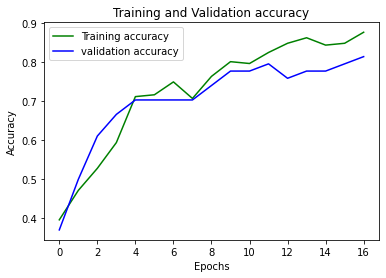

In [57]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(17)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

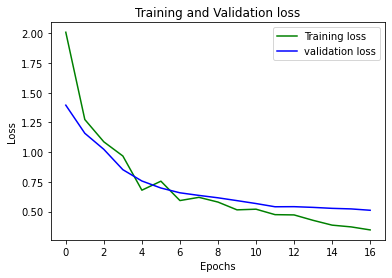

In [58]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(17)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
score = model.evaluate(X_test, Y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.5105978846549988
Test accuracy: 0.8148148059844971


In [60]:
pred = model.predict(X_test)

2/2 [==============================] - 0s 48ms/step


In [61]:
label_unique = {}

for i in range(len(labels_train_unique)):
  label_unique[labels_train_unique[i]] = i
label_unique

{'Bowlegs': 0, 'Knock Knees': 1, 'Normal Knee': 2}

In [62]:
print('Evaluating Network...')
print(classification_report(Y_test.argmax(axis=1),
                            pred.argmax(axis=1), target_names= label_unique))

Evaluating Network...
              precision    recall  f1-score   support

     Bowlegs       0.75      0.38      0.50         8
 Knock Knees       0.83      0.75      0.79        20
 Normal Knee       0.81      1.00      0.90        26

    accuracy                           0.81        54
   macro avg       0.80      0.71      0.73        54
weighted avg       0.81      0.81      0.80        54



# MobileNet Bu SFI

In [63]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

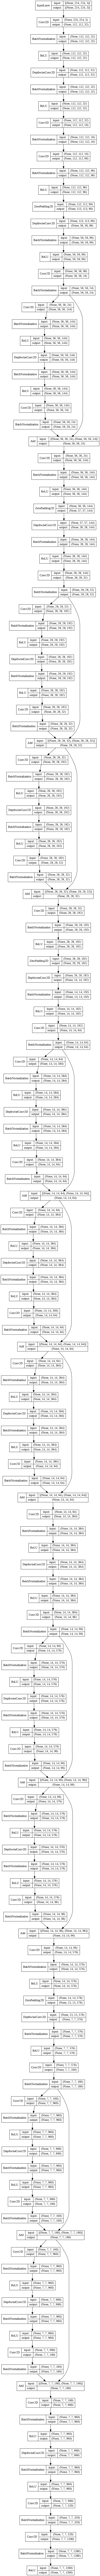

In [70]:
conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
conv_base.trainable= False
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [71]:
model2 = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [72]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [73]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.0001)
model2.compile(optimizer = optimizers,
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [74]:
history= model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30)

Epoch 1/30
7/7 [==============================] - 4s 213ms/step - loss: 1.2513 - accuracy: 0.3679 - val_loss: 1.1926 - val_accuracy: 0.3519
Epoch 2/30
7/7 [==============================] - 0s 71ms/step - loss: 1.1819 - accuracy: 0.3632 - val_loss: 1.1166 - val_accuracy: 0.4074
Epoch 3/30
7/7 [==============================] - 0s 60ms/step - loss: 1.1305 - accuracy: 0.3679 - val_loss: 1.0628 - val_accuracy: 0.4259
Epoch 4/30
7/7 [==============================] - 0s 60ms/step - loss: 1.0899 - accuracy: 0.4151 - val_loss: 1.0226 - val_accuracy: 0.4815
Epoch 5/30
7/7 [==============================] - 0s 61ms/step - loss: 1.0541 - accuracy: 0.4481 - val_loss: 0.9868 - val_accuracy: 0.5185
Epoch 6/30
7/7 [==============================] - 0s 60ms/step - loss: 1.0179 - accuracy: 0.4858 - val_loss: 0.9555 - val_accuracy: 0.5556
Epoch 7/30
7/7 [==============================] - 0s 62ms/step - loss: 0.9861 - accuracy: 0.4906 - val_loss: 0.9283 - val_accuracy: 0.6111
Epoch 8/30
7/7 [==========

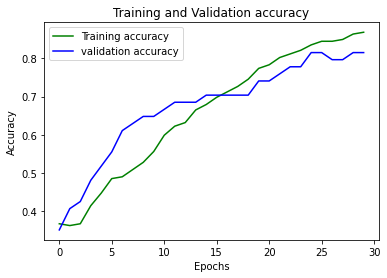

In [75]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(30)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

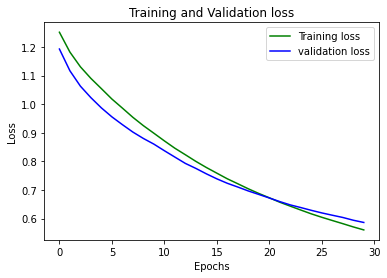

In [77]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(30)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()